In [1]:
# Create histograms comparing 2 sets of tracks (usually ants vs simulAnts)
# Inputs: 2 DataFrames of the tracks w/ x,y,t,id (to be selected below)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run ../data_prep/trackfuns.py

In [2]:
# Import data
varNames = ['x','y','t','id']
dataPath1 = r'C:\Users\stpop\Documents\MATLAB\clean_695423\HRM_W1_ants' # ant data?
dataPath2 = r'C:\Users\stpop\Documents\MATLAB\clean_695423\HRM_T3_ants' # simulAnt data?

# Labels to be displayed in the legends
lab1 = 'Ants'
lab2 = 'SumulAnts'

dat1 = addMetrics(pd.read_csv(dataPath1+'.txt', usecols=varNames))
dat2 = addMetrics(pd.read_csv(dataPath2+'.txt', usecols=varNames))

ids1 = np.unique(dat1.id)
ids2 = np.unique(dat2.id)

# Equallizing #of tracks to make histograms comparable
if len(ids1) == len(ids2):
    print('Nr of tracks: ' + str(len(ids1)))
elif len(ids1)>len(ids2):
    print('\033[1;33m' + 'WARNING: Nr of tracks unequal! '+
          lab1+': ' + str(len(ids1)) + ', ' +
          lab2+': ' + str(len(ids2)) + '. Picking first ' + str(len(ids2)) + ' tracks of ' + lab1)
    idsMatch = ids1[:len(ids2)]
    dat1 = dat1[np.isin(dat1.id,idsMatch)]
else:
    print('\033[1;33m' + 'WARNING: Nr of tracks unequal! '+
      lab1+': ' + str(len(ids1)) + ', ' +
      lab2+': ' + str(len(ids2)) + '. Picking first ' + str(len(ids1)) + ' tracks of ' + lab2)
    idsMatch = ids2[:len(ids1)]
    dat2 = dat2[np.isin(dat2.id,idsMatch)]

In [4]:
# Calculates all summary metrics (from trackfuns.py)
sumStats1 = sum_stats(dat1)
sumStats2 = sum_stats(dat2)

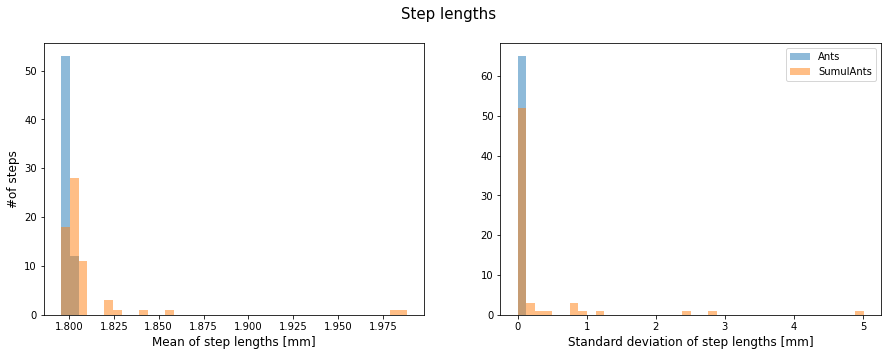

In [5]:
# Are step lengths the same (across all tracks)?
fig,ax = plt.subplots(1,2, figsize=(15,5))
bins=np.histogram(np.hstack((sumStats1.sMu,sumStats2.sMu)), bins=40)[1] #get the bin edges
ax[0].hist(sumStats1.sMu,bins, alpha=0.5)
ax[0].hist(sumStats2.sMu,bins,alpha=0.5)
ax[0].set_ylabel('#of steps', fontsize=12)
ax[0].set_xlabel('Mean of step lengths [mm]', fontsize=12)

bins=np.histogram(np.hstack((sumStats1.sSD,sumStats2.sSD)), bins=40)[1] #get the bin edges
ax[1].hist(sumStats1.sSD,bins,alpha=0.5, label=lab1)
ax[1].hist(sumStats2.sSD,bins,alpha=0.5, label=lab2)
ax[1].set_xlabel('Standard deviation of step lengths [mm]', fontsize=12)
ax[1].legend()
plt.suptitle('Step lengths',fontsize=15)
plt.show()

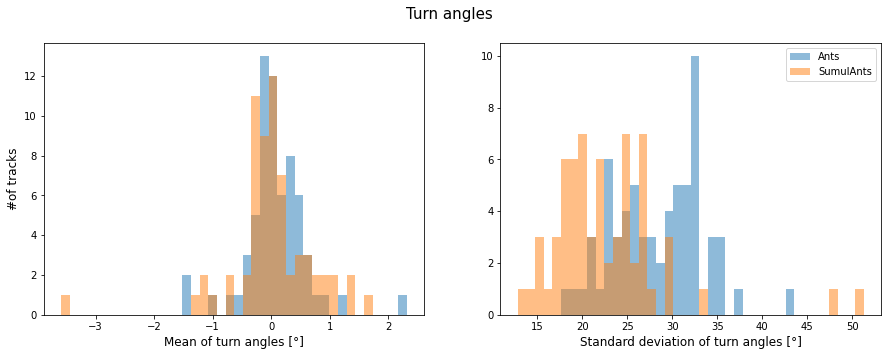

In [6]:
# Are turn angles the same (across all tracks)?
fig,ax = plt.subplots(1,2, figsize=(15,5))
bins=np.histogram(np.hstack((sumStats1.alphaMu,sumStats2.alphaMu)), bins=40)[1] #get the bin edges
ax[0].hist(sumStats1.alphaMu, bins, alpha=0.5)
ax[0].hist(sumStats2.alphaMu, bins, alpha=0.5)
ax[0].set_ylabel('#of tracks', fontsize=12)
ax[0].set_xlabel('Mean of turn angles [°]', fontsize=12)

bins=np.histogram(np.hstack((sumStats1.alphaSD,sumStats2.alphaSD)), bins=40)[1] #get the bin edges
ax[1].hist(sumStats1.alphaSD,bins,alpha=0.5, label=lab1)
ax[1].hist(sumStats2.alphaSD,bins,alpha=0.5, label=lab2)
ax[1].set_xlabel('Standard deviation of turn angles [°]', fontsize=12)
ax[1].legend()
plt.suptitle('Turn angles',fontsize=15)
plt.show()

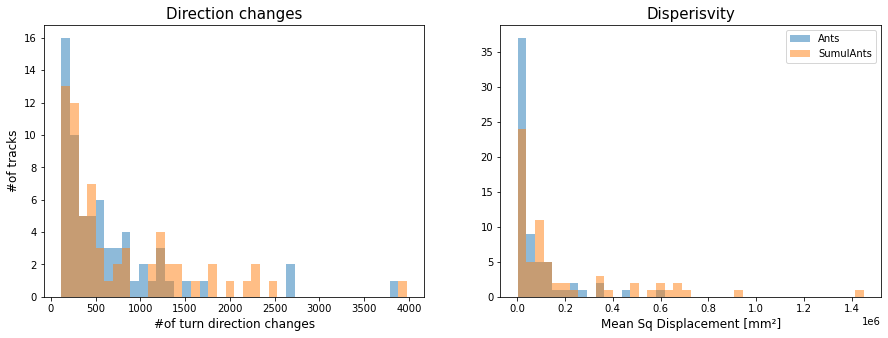

In [7]:
# #of turn direction changes & MSD
fig,ax = plt.subplots(1,2, figsize=(15,5))
bins=np.histogram(np.hstack((sumStats1.turnChg,sumStats2.turnChg)), bins=40)[1] #get the bin edges
ax[0].hist(sumStats1.turnChg, bins, alpha=0.5)
ax[0].hist(sumStats2.turnChg, bins, alpha=0.5)
ax[0].set_ylabel('#of tracks', fontsize=12)
ax[0].set_xlabel('#of turn direction changes', fontsize=12)
ax[0].set_title('Direction changes',fontsize=15)

bins=np.histogram(np.hstack((sumStats1.MSD,sumStats2.MSD)), bins=40)[1] #get the bin edges
ax[1].hist(sumStats1.MSD,bins,alpha=0.5, label=lab1)
ax[1].hist(sumStats2.MSD,bins,alpha=0.5, label=lab2)
ax[1].set_xlabel('Mean Sq Displacement [mm\u00b2]', fontsize=12)
ax[1].set_title('Disperisvity',fontsize=15)
ax[1].legend()
plt.show()

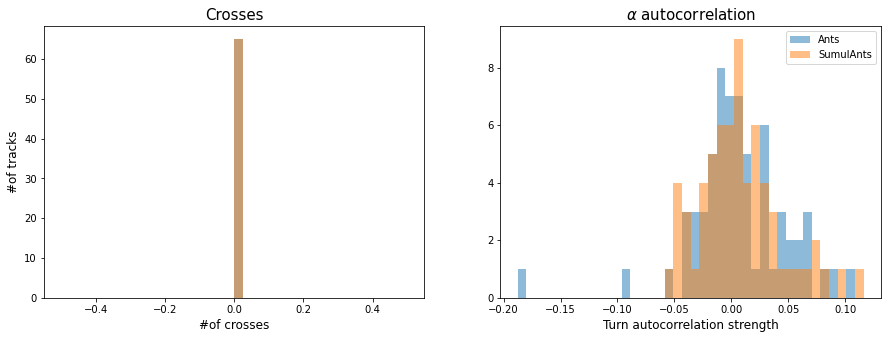

In [8]:
# #of crosses & turn autocorrelation
fig,ax = plt.subplots(1,2, figsize=(15,5))
bins=np.histogram(np.hstack((sumStats1.nrCross,sumStats2.nrCross)), bins=40)[1] #get the bin edges
ax[0].hist(sumStats1.nrCross, bins, alpha=0.5)
ax[0].hist(sumStats2.nrCross, bins, alpha=0.5)
ax[0].set_ylabel('#of tracks', fontsize=12)
ax[0].set_xlabel('#of crosses', fontsize=12)
ax[0].set_title('Crosses',fontsize=15)

bins=np.histogram(np.hstack((sumStats1.turnAcRho,sumStats2.turnAcRho)), bins=40)[1] #get the bin edges
ax[1].hist(sumStats1.turnAcRho,bins,alpha=0.5, label=lab1)
ax[1].hist(sumStats2.turnAcRho,bins,alpha=0.5, label=lab2)
ax[1].set_xlabel('Turn autocorrelation strength', fontsize=12)
ax[1].set_title(r'$\alpha$ autocorrelation',fontsize=15)
ax[1].legend()
plt.show()